<a href="https://colab.research.google.com/github/Daniel022de/DataAnalysis_Financial/blob/main/atividades_praticas/atividade_pratica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🔧 EXERCICIO PRÁTICO**


**Faça a leitura das bases de dados abaixo:**


* Bradesco
* Banco do Brasil
* Itaú
* Caixa Seguridade Participações
* BOVA11

**E depois faça o que se pede abaixo:**

- Sete o intervalo de 23/02/2022 até hoje.
- Nomeie todas as colunas de modo a ficar simples a visualização.
- Crie pelo menos um gráfico de cada um dos estudados, para as ações acima.
- Normalize os dados das ações, e julgue a que achar mais rentável. 

**Ao final, responda a pergunta:**
-  Ao final do seu intervalo de tempo, em qual você teria ganho mais dinheiro se investisse?

✅ **Você pode encontrar esse notebook no repositório** [GitHub](https://github.com/Daniel022de/DataAnalysis_Financial)

✅ **Você pode entrar em contato através dos email** ddololiveira.pessoal@gmail.com

✅ **Toda dúvida,recomendações e feedbacks serão bem-vindas.**

#⚡ Instalação

↪`Como os dados serão extraídos do site Yahoo Finanças, vou utilizar o módulo yfinance para realizar essa tarefa.` 

In [ ]:
#yfinance
!pip3 install --upgrade yfinance

#⚡ Importando bibliotecas

In [69]:
#yfinance para extração de dados
import yfinance as yf

#Pandas para manipulação dos dados
import pandas as pd

#Biblioteca para criação do gráfico

import plotly.express as px

#⚡ Extraindo dados

↪ `O propósito é julgar a ação mais rentável, para isso será extraido apenas os dados correspondentes ao fechamento de cada ação no intervalo apontando na atividade. Consolidando esses dados em um DataFrame Pandas.`

In [70]:
acoes = ['BBDC4.SA','BBDC3.SA','ITSA4.SA','CXSE3.SA','BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2022-02-23')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
acoes_df.head()

,BBDC4.SA,BBDC3.SA,ITSA4.SA,CXSE3.SA,BOVA11.SA
Date,,,,,
2022-02-23,18.981817,15.818181,9.163636,8.40,107.580002
2022-02-24,18.409090,15.463636,9.018181,8.23,107.480003
2022-02-25,18.500000,15.509090,9.109090,8.32,108.900002
2022-03-02,18.309090,15.381818,9.045454,8.34,111.099998
2022-03-03,18.645454,15.563636,9.072727,8.52,111.019997


#⚡ Tratamento | Normalização dos dados

##✅ Backup

In [72]:
acoes_df_trat = acoes_df.copy()

##✅ Tratamento - Renomeando colunas

In [73]:
acoes_df_trat.rename(columns={
    'BBDC4.SA': 'BRADESCO',
    'BBDC3.SA': 'BANCO DO BRASIL',
    'ITSA4.SA': 'ITAU',
    'CXSE3.SA': 'CAIXA',
    'BOVA11.SA': 'BOVA11'
},inplace=True)

##✅ Normalização dos dados

↪ `Para que ocorra uma análise com uma comparação igualitária entre as ações, é necessário que os fechamentos partam de um mesmo valor. Por isso todas as ações terão o 1 como valor inicial de fechamento no intervalo determinado pela atividade.`

In [74]:
for i in acoes_df_trat.columns:
  acoes_df_trat[i] = acoes_df_trat[i]/acoes_df_trat[i][0]

print(acoes_df_trat)

            BRADESCO  BANCO DO BRASIL      ITAU     CAIXA    BOVA11
Date                                                               
2022-02-23  1.000000         1.000000  1.000000  1.000000  1.000000
2022-02-24  0.969828         0.977586  0.984127  0.979762  0.999070
2022-02-25  0.974617         0.980460  0.994048  0.990476  1.012270
2022-03-02  0.964559         0.972414  0.987103  0.992857  1.032720
2022-03-03  0.982280         0.983908  0.990079  1.014286  1.031976
...              ...              ...       ...       ...       ...
2023-02-15  0.724904         0.766839  0.953770  1.002381  0.985778
2023-02-16  0.738602         0.772529  0.955952  1.029762  0.989961
2023-02-17  0.734387         0.771897  0.953770  1.022619  0.981223
2023-02-22  0.727012         0.759885  0.934127  1.022619  0.963004
2023-02-23  0.730172         0.763678  0.939583  1.026191  0.967838

[250 rows x 5 columns]


#⚡ Plotando gráficos de análise

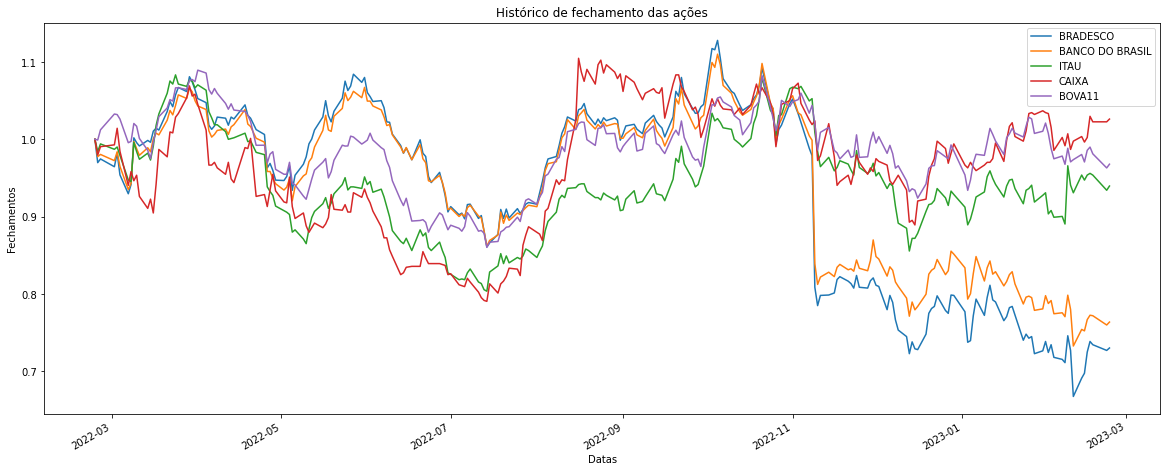

In [75]:
#Gráfico estático

acoes_df_trat.plot.line(figsize=(20,8), xlabel='Datas', ylabel='Fechamentos', title = 'Histórico de fechamento das ações');

In [76]:
#Gráfico dinâmico

figura = px.line(title = 'Histórico de fechamento das ações')

for i in acoes_df_trat.columns:
  figura.add_scatter(x= acoes_df_trat.index ,y= acoes_df_trat[i] , name= i)

figura.show()

#⁉ **RESPONDENDO A PERGUNTA**

↪ `Ao final do seu intervalo de tempo, em qual você teria ganho mais dinheiro se investisse?`

Com base nos dados apresentados pelos gráficos, eu teria mais ganhos no investimento se investisse na Caixa Seguridade Participações.
